In [1]:
# Imports and housekeeping
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error as MSE

In [2]:
# Import the main dataset
df = pd.read_csv('churn_clean.csv',dtype={'locationid':np.int64})

In [3]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
# Drops columns with no relevance to the research question
df_data = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng',
                   'Population', 'TimeZone', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie',
                   'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
                   'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)

In [5]:
# Display dataset top 5 rows
df_data.head()

,Area,Job,Children,Age,Income,Marital,Gender,Churn,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,Urban,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,6.795513,172.455519,904.536110
1,Urban,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,1.156681,242.632554,800.982766
2,Urban,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,15.754144,159.947583,2054.706961
3,Suburban,Solicitor,1,48,18925.23,Married,Male,No,17.087227,119.956840,2164.579412
4,Suburban,Medical illustrator,0,83,40074.19,Separated,Male,Yes,1.670972,149.948316,271.493436


In [6]:
# Display data set number of rows and colums
df_data.shape

(10000, 11)

In [7]:
# Check data for null or missing values
df_data.isna().any()

Area                 False
Job                  False
Children             False
Age                  False
Income               False
Marital              False
Gender               False
Churn                False
Tenure               False
MonthlyCharge        False
Bandwidth_GB_Year    False
dtype: bool

In [8]:
# Check data for duplicated rows
df_data.duplicated().sum()

0

In [9]:
# Display summary statistics for dataset - continuous variables
df_data.describe()

,Children,Age,Income,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,34.526188,172.624816,3392.341550
std,2.1472,20.698882,28199.916702,26.443063,42.943094,2185.294852
min,0.0000,18.000000,348.670000,1.000259,79.978860,155.506715
25%,0.0000,35.000000,19224.717500,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,33170.605000,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,53246.170000,61.479795,200.734725,5586.141370
max,10.0000,89.000000,258900.700000,71.999280,290.160419,7158.981530


In [10]:
# Display summary statistics for dataset - categorical variables
df_data.describe(include = object)

,Area,Job,Marital,Gender,Churn
count,10000,10000,10000,10000,10000
unique,3,639,5,3,2
top,Suburban,Occupational psychologist,Divorced,Female,No
freq,3346,30,2092,5025,7350


In [11]:
# Too many unique values, drop Job column
df_data = df_data.drop(['Job'], axis=1)

In [12]:
# Display summary statistics for dataset - categorical variables
df_data.describe(include = object)

,Area,Marital,Gender,Churn
count,10000,10000,10000,10000
unique,3,5,3,2
top,Suburban,Divorced,Female,No
freq,3346,2092,5025,7350


In [13]:
# Convert categorical variables (excluding Churn) to numeric via pd.get_dummies
df_data = pd.get_dummies(df_data, columns = ['Area', 'Marital', 'Gender'], dtype = int)

In [14]:
# Convert categorical variables (excluding Churn) to numeric via pd.get_dummies
df_data = pd.get_dummies(df_data, columns = ['Churn'], drop_first = True, dtype = int)

In [15]:
# Display dataset info
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Children               10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Income                 10000 non-null  float64
 3   Tenure                 10000 non-null  float64
 4   MonthlyCharge          10000 non-null  float64
 5   Bandwidth_GB_Year      10000 non-null  float64
 6   Area_Rural             10000 non-null  int64  
 7   Area_Suburban          10000 non-null  int64  
 8   Area_Urban             10000 non-null  int64  
 9   Marital_Divorced       10000 non-null  int64  
 10  Marital_Married        10000 non-null  int64  
 11  Marital_Never Married  10000 non-null  int64  
 12  Marital_Separated      10000 non-null  int64  
 13  Marital_Widowed        10000 non-null  int64  
 14  Gender_Female          10000 non-null  int64  
 15  Gen

In [16]:
# Export prepared dataframe to CSV
df_data.to_csv(r'/home/wstults/anaconda3/Jupyter/d209/Data-Mining---Random-Forest/Data-Mining---Random-Forest/churn_clean_prepared.csv')

In [17]:
# Generate train/test split
y = df_data['Churn_Yes'].values
X = df_data.drop('Churn_Yes', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y)

In [18]:
# Create dataframes from train/test splits and export as CSV
X_train_data = pd.DataFrame(data = X_train)
X_train_data.to_csv(r'/home/wstults/anaconda3/Jupyter/d209/Data-Mining---Random-Forest/Data-Mining---Random-Forest/X_train.csv')
X_test_data = pd.DataFrame(data = X_test)
X_test_data.to_csv(r'/home/wstults/anaconda3/Jupyter/d209/Data-Mining---Random-Forest/Data-Mining---Random-Forest/X_test.csv')
y_train_data = pd.DataFrame(data = y_train)
y_train_data.to_csv(r'/home/wstults/anaconda3/Jupyter/d209/Data-Mining---Random-Forest/Data-Mining---Random-Forest/y_train.csv')
y_test_data = pd.DataFrame(data = y_test)
y_test_data.to_csv(r'/home/wstults/anaconda3/Jupyter/d209/Data-Mining---Random-Forest/Data-Mining---Random-Forest/y_test.csv')

In [19]:
# Initialize Estimator
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
# Evaluate the test set RMSE
rmse_baseline = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of Baseline: {:.4f}'.format(rmse_baseline))

Test set RMSE of Baseline: 0.6286


In [20]:
lr = LinearRegression()
l_model = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
rmse_linear = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of Linear Regression: {:.4f}'.format(rmse_linear))

Test set RMSE of Linear Regression: 0.3372


In [21]:
# Instantiate rf
rf = RandomForestRegressor(n_estimators=25, max_depth = 5, random_state=42)
            
# Fit rf to the training set    
rf.fit(X_train, y_train)

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of Random Forest: {:.4f}'.format(rmse_test))

Test set RMSE of Random Forest: 0.3235


In [22]:
## Define Grid 
parameters = { 
    'n_estimators': [15,25,35],
    'max_depth': [3,5,7],
    'random_state' : [42]
}
## show start time
print(datetime.now())
## Grid Search function
CV_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters)
CV_rf.fit(X_train, y_train)
## show end time
print(datetime.now())
print(CV_rf.best_params_)

2022-05-23 16:36:48.015180
2022-05-23 16:37:04.218667
{'max_depth': 7, 'n_estimators': 35, 'random_state': 42}


In [23]:
# Instantiate rf
rf = RandomForestRegressor(n_estimators=35, max_depth = 7, random_state=42)
            
# Fit rf to the training set    
rf.fit(X_train, y_train)

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of Random Forest: {:.4f}'.format(rmse_test))

Test set RMSE of Random Forest: 0.3200


In [24]:
print('Test set RMSE of Baseline: {:.4f}'.format(rmse_baseline))
print('Test set RMSE of Linear Regression: {:.4f}'.format(rmse_linear))
print('Test set RMSE of Random Forest: {:.4f}'.format(rmse_test))

Test set RMSE of Baseline: 0.6286
Test set RMSE of Linear Regression: 0.3372
Test set RMSE of Random Forest: 0.3200


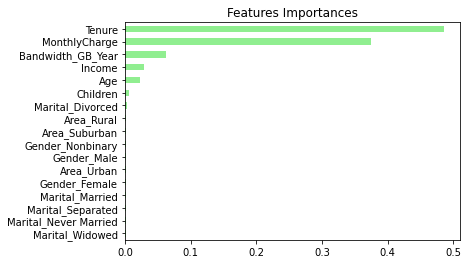

In [25]:
X_data = pd.DataFrame(df_data.drop('Churn_Yes', axis=1))
#X_df_data = pd.DataFrame(X_data, columns = X_train.columns)
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_data.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()